<a href="https://colab.research.google.com/github/CamiSilvae/PDI/blob/main/Laboratorio/Pr%C3%A1cticas/Pr%C3%A1ctica5/PDI_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica N°05
**Tipos de Traslaciones de Imágenes**


---

EQUIPO 8

*   2109522 - Camila Andrea Silva Espinoza
*   2049215 - Norma Cecilia Cázares del Ángel
*   2109208 - Alejandro de Jesús Guerrero Maynes
*   2109690 - Mariana Seany Zamarripa Puente


**1. Carga de un archivo**

La siguiente función se encarga de abrir una ventana para subir una imagen y la variable "uploaded" se encarga de guardarlo con el nombre del archivo

In [11]:
from google.colab import files
print("(PARTE I - Transformaciones)")
uploaded1 = files.upload()

print("\nPARTE II - Comparación o nueva prueba")
uploaded2 = files.upload()

(PARTE I - Transformaciones)


Saving RMIcerebral.jpg to RMIcerebral (1).jpg

PARTE II - Comparación o nueva prueba


Saving RadiografíaTorax.jpg to RadiografíaTorax.jpg


**2. Instalación e importación de librebrías**

Instala las librerias necesarias y las importa; "Kmeans" se utilizará para lograr agrupar los colores

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**3. Lectura de imagen**

Convierte la imagen a escala de grises y devuleve el arreglo listo para aplicar transformaciones

In [13]:
def cargar_imagen(uploaded_dict, gris=True):
    nombre = next(iter(uploaded_dict.keys()))
    img = cv2.imread(nombre)
    if img is None:
        raise ValueError("No se pudo cargar la imagen.")
    if gris:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

**4. Funciones de transformación geométrica**



*   TRASLACIÓN BÁSICA

Desplaza la imagen entera una cantidad de píxeles, donde se realiza con una matriz de transformación afín 2x3



In [14]:
def traslacion_basica(img, dx, dy):
    filas, cols = img.shape[:2]
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    trasladada = cv2.warpAffine(img, M, (cols, filas))
    return trasladada

*  TRASLACIÓN DECIMAL

Parecido al anterior pero enfocandose en desplazamientos fraccionarios utilizando interpolación bilinealpara lograr visualizar el resultado

In [15]:
def traslacion_decimal(img, dx, dy):
    filas, cols = img.shape[:2]
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    trasladada = cv2.warpAffine(img, M, (cols, filas), flags=cv2.INTER_LINEAR)
    return trasladada

*   TRASLACIÓN + ROTACIÓN

Primeramente traslada la imagen y luego la rota 45° respecto a su centro; esto mediante una función específica

In [16]:
def traslacion_rotacion(img, dx, dy, angulo):
    t = traslacion_basica(img, dx, dy)
    filas, cols = t.shape[:2]
    centro = (cols // 2, filas // 2)
    Mrot = cv2.getRotationMatrix2D(centro, angulo, 1)
    rotada = cv2.warpAffine(t, Mrot, (cols, filas))
    return rotada

*   TRANSFORMACIÓN + ROTACIÓN + ESCALADO

Combina las 3 operaciones (desplazamiento, giro y cambio de tamaño) permitiendo ibservar la manera en que afectan en conjunto al resultado

In [17]:
def tras_rot_esc(img, dx, dy, angulo, escala):
    t = traslacion_basica(img, dx, dy)
    filas, cols = t.shape[:2]
    centro = (cols // 2, filas // 2)
    Mrot = cv2.getRotationMatrix2D(centro, angulo, escala)
    salida = cv2.warpAffine(t, Mrot, (cols, filas))
    return salida

*   TRANSFORMACIÓN AFÍN

Modifica la forma mediante 3 puntos de referencia, creando efectos de torsión o deformación controlada

In [18]:
def transformacion_afin(img):
    filas, cols = img.shape[:2]
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(img, M, (cols, filas))
    return dst

*   DISTORSIÓN RADIAL

Simula un efecto tipo ojo de pez o lente curva, utilizando parámetros de cámara para deformar la imagen de manera no lineal

In [19]:
def distorsion_radial(img):
    filas, cols = img.shape[:2]
    K = np.array([[cols, 0, cols/2],
                  [0, cols, filas/2],
                  [0, 0, 1]], dtype=np.float32)
    D = np.array([0.4, 0.1, 0, 0], dtype=np.float32)
    map1, map2 = cv2.initUndistortRectifyMap(K, D, None, K, (cols, filas), 5)
    salida = cv2.remap(img, map1, map2, cv2.INTER_LINEAR)
    return salida

Carga de las 2 imágenes

In [20]:
imagen1 = cargar_imagen(uploaded1, gris=True)
imagen2 = cargar_imagen(uploaded2, gris=True)

print("Imágenes cargadas correctamente.")

Imágenes cargadas correctamente.


# Parte 1
**Transformaciones geométricas**

En esta parte se ejecuta cada ejercicio en orden, mostrando los resultados comparativos con subplots:


1.   Ejercicio1: Traslación entera
2.   Ejercicio2: Traslación decimal
3.   Ejercicio3: Traslación+Rotación
4.   Ejercicio4: Combinación con escalado
5.   Ejercicio5: Comparación entre Transformación Afín y Distorsión Radial

Donde se logra visualizar acada una de sus imagenes con su título



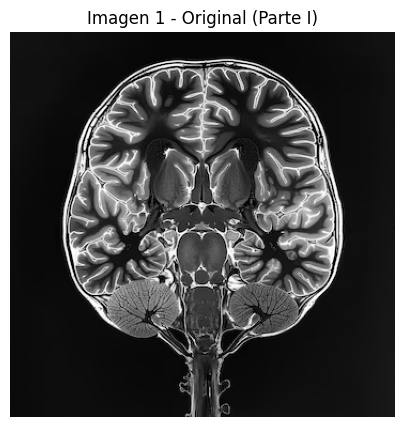

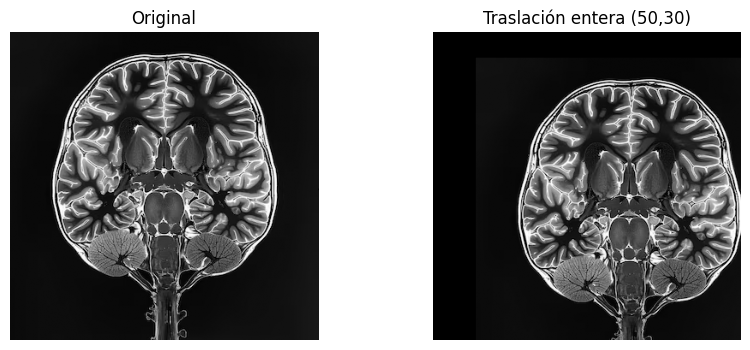

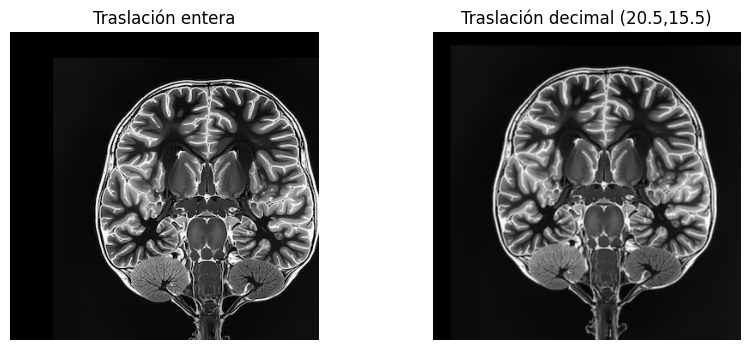

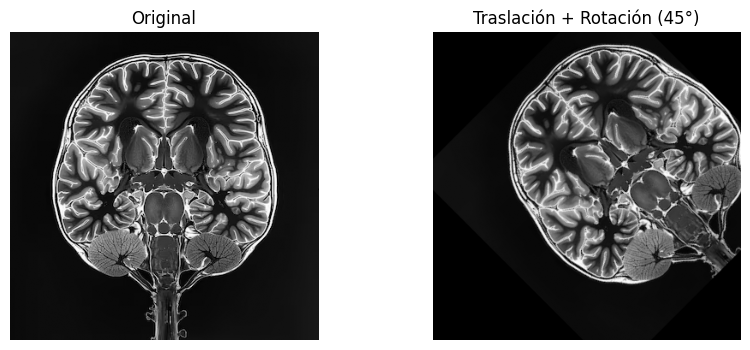

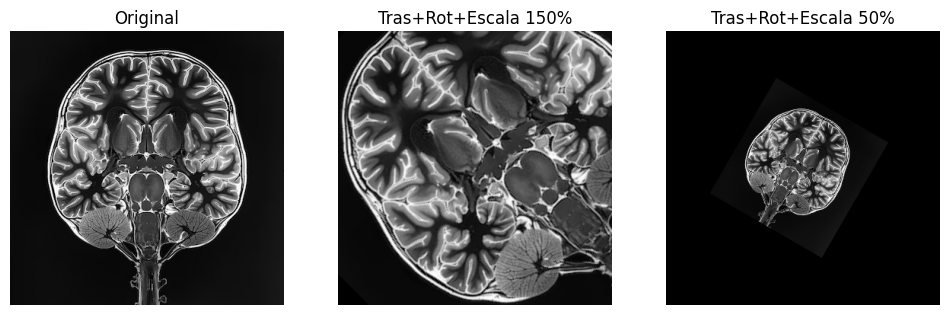

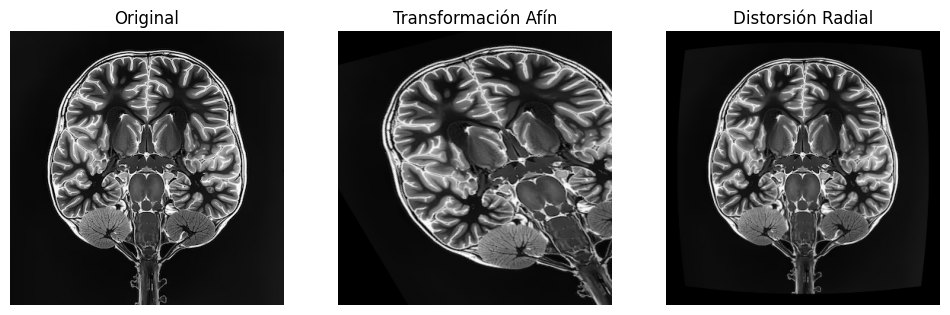

In [21]:
imagen = imagen1

plt.figure(figsize=(5,5))
plt.imshow(imagen, cmap='gray')
plt.title("Imagen 1 - Original (Parte I)")
plt.axis('off')
plt.show()

t1 = traslacion_basica(imagen, 50, 30)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(imagen, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(t1, cmap='gray'); plt.title("Traslación entera (50,30)"); plt.axis('off')
plt.show()

t2 = traslacion_decimal(imagen, 20.5, 15.5)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(t1, cmap='gray'); plt.title("Traslación entera"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(t2, cmap='gray'); plt.title("Traslación decimal (20.5,15.5)"); plt.axis('off')
plt.show()

t3 = traslacion_rotacion(imagen, 50, 30, 45)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(imagen, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(t3, cmap='gray'); plt.title("Traslación + Rotación (45°)"); plt.axis('off')
plt.show()

t4 = tras_rot_esc(imagen, 30, 15, 45, 1.5)
t5 = tras_rot_esc(imagen, -20, 10, -30, 0.5)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(imagen, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(t4, cmap='gray'); plt.title("Tras+Rot+Escala 150%"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(t5, cmap='gray'); plt.title("Tras+Rot+Escala 50%"); plt.axis('off')
plt.show()

afin = transformacion_afin(imagen)
radial = distorsion_radial(imagen)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(imagen, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(afin, cmap='gray'); plt.title("Transformación Afín"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(radial, cmap='gray'); plt.title("Distorsión Radial"); plt.axis('off')
plt.show()


# Parte 2

**Nueva imagen y comparación**


PARTE II: Aplicando transformaciones a la segunda imagen


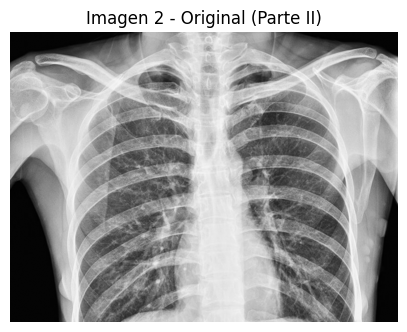

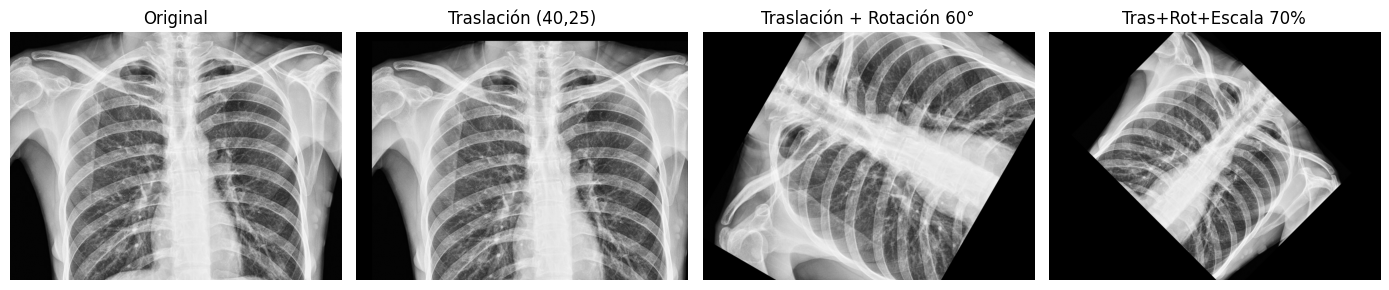

FIN.


In [22]:
print("\nPARTE II: Aplicando transformaciones a la segunda imagen")
imagen = imagen2

plt.figure(figsize=(5,5))
plt.imshow(imagen, cmap='gray')
plt.title("Imagen 2 - Original (Parte II)")
plt.axis('off')
plt.show()

t1b = traslacion_basica(imagen, 40, 25)
t2b = traslacion_rotacion(imagen, 30, 20, 60)
t3b = tras_rot_esc(imagen, -25, 10, -45, 0.7)

plt.figure(figsize=(14,4))
plt.subplot(1,4,1); plt.imshow(imagen, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(t1b, cmap='gray'); plt.title("Traslación (40,25)"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(t2b, cmap='gray'); plt.title("Traslación + Rotación 60°"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(t3b, cmap='gray'); plt.title("Tras+Rot+Escala 70%"); plt.axis('off')
plt.tight_layout()
plt.show()

print("FIN.")